# Sample notebook to outout csv files of WIN data

- Apr 05, 2021  Yasunori Sawaki

To run each cell, just to enter `Shift+Enter` or `Ctrl+Enter`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install `ObsPy`

In [5]:
!pip uninstall scipy -y  # !pip install --upgrade scipy
!pip install obspy

     |████████████████████████████████| 24.7MB 64.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 27.4MB 163kB/s 
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21667988 sha256=e34491b0e1207c15e7613a8d7ea2cb4ba404aec571e291c2b20333fc73b15ccd
  Stored in directory: /root/.cache/pip/wheels/94/e0/86/44fd4cea7661f42431c8f6d030f2758ff275cccffcbe8fa2b8
Successfully built obspy
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


## Import necessary modules

In [1]:
import sys
from pathlib import Path
import argparse

import numpy as np
import matplotlib.pyplot as plt

import obspy as ob

Look for the directory named `StudentExperiment` and right click for **`Copy path`**.  
左側のタブ`ファイル`から`StudentExperiment`という名前のフォルダを探し，フォルダ上で右クリックして「パスをコピー」を選択する

In [2]:
#@title Paste the path here パスを貼り付けて実行

projectBaseDir = '/content/drive/MyDrive/ItoLab/StudentExperiment' #@param {type:"string"}
projectBaseDir = Path(projectBaseDir)

if projectBaseDir.exists():
    sys.path.append(str(projectBaseDir))
    from winpy import WinTools
else:
    raise FileNotFoundError(f'Path not found. Check again projectBaseDir: {projectBaseDir}')

## Call the `WinTools` class

In [3]:
wt = WinTools()

### Read WIN files

In [4]:
st = wt.read(projectBaseDir/'data'/'2021040213.9905100001')

### Plot waveforms

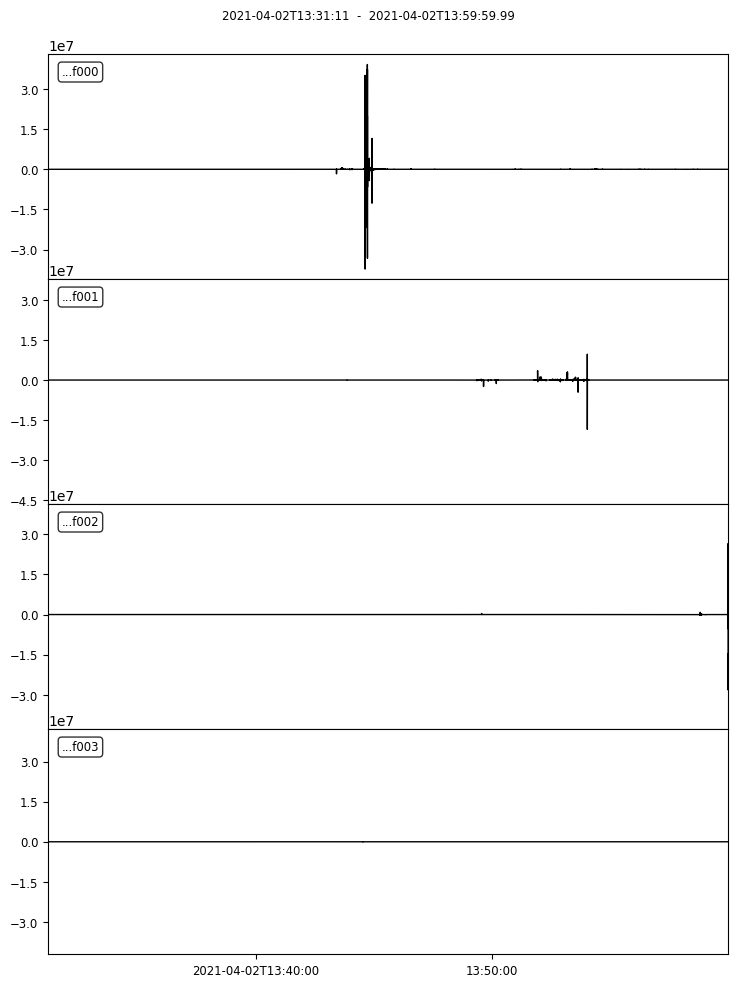

In [7]:
st.plot();  # wt.stream.plot();

### Customize ploting styles

- [Waveform Plotting Tutorial](https://docs.obspy.org/tutorial/code_snippets/waveform_plotting_tutorial.html) (`ObsPy` HP)

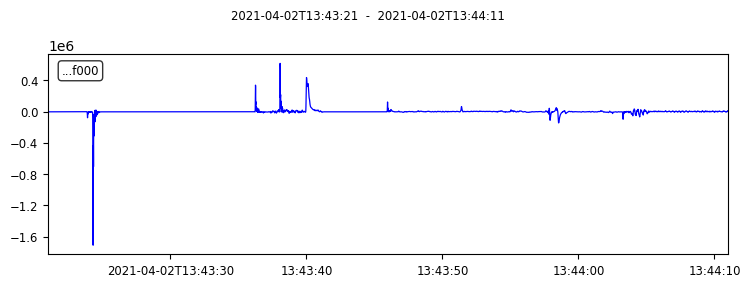

In [10]:
starttime = st[0].stats.starttime
st[0].plot(
    starttime=starttime+730, endtime=starttime+780,
    color='blue', linewidth=0.9, size=(800, 300)
);

### Save waveforms as various formats

In [5]:
wt.write(projectBaseDir/'output'/'test.csv', 'CSV', decimate=10)

In [6]:
wt.write(projectBaseDir/'output'/'test.sac', 'SAC')

ValueError: ignored

In [7]:
wt.write(projectBaseDir/'output'/'test.txt', 'TSPAIR', decimate=10)